# Air Quality Index in India (2015 - 2020) 

Air is what keeps humans alive. Monitoring it and understanding its quality is of immense importance to our well-being. In this project, analysis is performed on different pollutants in the air in some of well known cities in India.

### We will begin by importing all the libraries that we will use for Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Let's import the dataset that we will be working on!

The dataset that we will be using is [Air Quality Data in India (2015 - 2020)](https://www.kaggle.com/rohanrao/air-quality-data-in-india) taken from Kaggle.

The dataset contains air quality data and AQI (Air Quality Index) at hourly and daily level of various stations across multiple cities in India.

The various cities in the dataset includes Ahmedabad, Aizawl, Amaravati, Amritsar, Bengaluru, Bhopal, Brajrajnagar, Chandigarh, Chennai, Coimbatore, Delhi, Ernakulam, Gurugram, Guwahati, Hyderabad, Jaipur, Jorapokhar, Kochi, Kolkata, Lucknow, Mumbai, Patna, Shillong, Talcher, Thiruvananthapuram, Visakhapatnam

#### Acknowledgements

The data has been made publicly available by the [Central Pollution Control Board](https://cpcb.nic.in/) which is the official portal of Government of India.

For our analysis, we will be using the `city_day.csv`

In [2]:
city_day = pd.read_csv('./city_day.csv');
city_day

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


### We will now see a brief description of our dataset as well as the amount of missing values.

#### Description

In [3]:
city_day.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


#### Amount of Missing Values

In [4]:
city_day.isna().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

The above Series(`pd.Series`) gives us the amount of missing values in each of the columns present in the dataset.

Notice that columns `PM10 NH3 Toluene and Xylene` have lots of data that are missing. We cannot fill it with random values as it will indirectly affect the Air Quality Index. Hence we will be dropping these columns for further analysis.

## Data Cleaning

We will convert the `Date` to DateTime object so that it becomes easier to handle dates

In [5]:
city_day['Date']=pd.to_datetime(city_day['Date'])

Now we will group by each city and find out the amount of missing values in each of them

In [6]:
city_day = city_day.groupby(['City','Date'])
df = city_day.first()
df

PM2.5   PM10     NO    NO2    NOx    NH3     CO  \
City          Date                                                          
Ahmedabad     2015-01-01    NaN    NaN   0.92  18.22  17.15    NaN   0.92   
              2015-01-02    NaN    NaN   0.97  15.69  16.46    NaN   0.97   
              2015-01-03    NaN    NaN  17.40  19.30  29.70    NaN  17.40   
              2015-01-04    NaN    NaN   1.70  18.48  17.97    NaN   1.70   
              2015-01-05    NaN    NaN  22.10  21.42  37.76    NaN  22.10   
...                         ...    ...    ...    ...    ...    ...    ...   
Visakhapatnam 2020-06-27  15.02  50.94   7.68  25.06  19.54  12.47   0.47   
              2020-06-28  24.38  74.09   3.42  26.06  16.53  11.99   0.52   
              2020-06-29  22.91  65.73   3.45  29.53  18.33  10.71   0.48   
              2020-06-30  16.64  49.97   4.05  29.26  18.80  10.03   0.52   
              2020-07-01  15.00  66.00   0.40  26.85  14.05   5.20   0.59   

                            SO2      O3  Benzene  Toluene  Xylene   AQI  \
City          Date                                                        
Ahmedabad     2015-01-01  27.64  133.36     0.00     0.02    0.00   NaN   
              2015-01-02  24.55   34.06     3.68     5.50    3.77   NaN   
              2015-01-03  29.07   30.70     6.80    16.40    2.25   NaN   
              2015-01-04  18.59   36.08     4.43    10.14    1.00   NaN   
              2015-01-05  39.33   39.31     7.01    18.89    2.78   NaN   
...                         ...     ...      ...      ...     ...   ...   
Visakhapatnam 2020-06-27   8.55   23.30     2.24    12.07    0.73  41.0   
              2020-06-28  12.72   30.14     0.74     2.21    0.38  70.0   
              2020-06-29   8.42   30.96     0.01     0.01    0.00  68.0   
              2020-06-30   9.84   28.30     0.00     0.00    0.00  54.0   
              2020-07-01   2.10   17.05      NaN      NaN     NaN  50.0   

                            AQI_Bucket  
City          Date                      
Ahmedabad     2015-01-01           NaN  
              2015-01-02           NaN  
              2015-01-03           NaN  
              2015-01-04           NaN  
              2015-01-05           NaN  
...                                ...  
Visakhapatnam 2020-06-27          Good  
              2020-06-28  Satisfactory  
              2020-06-29  Satisfactory  
              2020-06-30  Satisfactory  
              2020-07-01          Good  

[29531 rows x 14 columns]

Before we find the missing values in each city, we will narrow down our dataset to only a few cities that we are concerned with and we will also remove the columns that had lot of missing values.

In [7]:
df = df.loc[['Bengaluru','Chennai','Kolkata','Delhi','Mumbai','Jaipur','Hyderabad','Patna','Visakhapatnam']]
columns = ['PM2.5','NO','NO2','NOx','CO','SO2','O3','Benzene','AQI','AQI_Bucket']
df = df[columns]
df

PM2.5     NO    NO2    NOx     CO    SO2     O3  \
City          Date                                                          
Bengaluru     2015-01-01    NaN   3.26  17.33  10.88   0.33   3.54  10.73   
              2015-01-02    NaN   6.05  19.73  14.14   1.35   3.97  22.77   
              2015-01-03    NaN  11.91  19.88  20.72  17.40  13.61  12.03   
              2015-01-04    NaN   7.45  21.61  16.88   5.05   6.52  17.70   
              2015-01-05    NaN   9.52  22.17  21.76   1.83   4.71  12.72   
...                         ...    ...    ...    ...    ...    ...    ...   
Visakhapatnam 2020-06-27  15.02   7.68  25.06  19.54   0.47   8.55  23.30   
              2020-06-28  24.38   3.42  26.06  16.53   0.52  12.72  30.14   
              2020-06-29  22.91   3.45  29.53  18.33   0.48   8.42  30.96   
              2020-06-30  16.64   4.05  29.26  18.80   0.52   9.84  28.30   
              2020-07-01  15.00   0.40  26.85  14.05   0.59   2.10  17.05   

                          Benzene   AQI    AQI_Bucket  
City          Date                                     
Bengaluru     2015-01-01     0.56   NaN           NaN  
              2015-01-02     0.65   NaN           NaN  
              2015-01-03     0.53   NaN           NaN  
              2015-01-04     0.55   NaN           NaN  
              2015-01-05     0.40   NaN           NaN  
...                           ...   ...           ...  
Visakhapatnam 2020-06-27     2.24  41.0          Good  
              2020-06-28     0.74  70.0  Satisfactory  
              2020-06-29     0.01  68.0  Satisfactory  
              2020-06-30     0.00  54.0  Satisfactory  
              2020-07-01      NaN  50.0          Good  

[15290 rows x 10 columns]

We will now find the missing values in each of the cities so that we will get a rough estimate on the data we are working with.

We will work with a temporary dataframe so that we don't change our original dataframe

In [8]:
temp_df = df
temp_df = temp_df.reset_index()
temp_df = temp_df.set_index('City')
cities = list(set(temp_df.index))
temp_df = temp_df.reset_index()

missing_values = []

for city in cities:
    missing_values.append(pd.Series(temp_df[temp_df['City']==city].isna().sum(),name=city))
    
missing_values_df = pd.concat(missing_values, axis=1, keys=[city.name for city in missing_values])
missing_values_df

,Visakhapatnam,Hyderabad,Jaipur,Patna,Chennai,Bengaluru,Delhi,Mumbai,Kolkata
City,0,0,0,0,0,0,0,0,0
Date,0,0,0,0,0,0,0,0,0
PM2.5,230,115,12,321,117,146,2,1225,55
NO,226,28,16,203,36,6,2,1242,26
NO2,248,28,14,204,36,6,2,1253,25
NOx,38,7,112,203,36,4,0,499,1
CO,39,5,7,151,25,11,0,25,0
SO2,227,26,12,205,36,6,110,1220,62
O3,229,26,15,278,49,144,84,1212,50
Benzene,38,127,22,172,285,266,0,210,1


We can see that `Mumbai Visakhapatnam and Patna` have lot of missing values

Let's find out where the missing values are in the dataset

We will groupby years and find out the missing values in those years.

Again we will create a temporary dataframe so that we dont mainpulate our original dataframe

In [9]:
temp_df = df
temp_df = temp_df.reset_index()
temp_df['Date'] = [date.year for date in temp_df['Date'].to_list()]
temp_df = temp_df.groupby(['Date','City'])
temp_df = temp_df.first()
temp_df

PM2.5      NO     NO2     NOx     CO     SO2      O3  \
Date City                                                                   
2015 Bengaluru       30.65    3.26   17.33   10.88   0.33    3.54   10.73   
     Chennai        173.51   16.30   15.39   22.68   1.17    9.20   11.35   
     Delhi          313.22   69.16   36.39  110.59  15.20    9.25   41.68   
     Hyderabad       47.03    3.70   17.19   20.89   0.30    2.58   30.34   
     Mumbai            NaN     NaN     NaN   27.38   0.00     NaN     NaN   
     Patna          100.96   14.41   25.06   39.32   1.56    1.80    8.89   
2016 Bengaluru       56.40   13.80   51.73   34.31   0.69    7.44   55.96   
     Chennai         65.97    5.86   32.92   32.56   0.67    0.94   34.57   
     Delhi          295.71   86.62   94.04  131.36   2.42   23.57  108.14   
     Hyderabad      232.83   11.17   17.35   26.85   1.45    8.56   27.64   
     Mumbai            NaN     NaN     NaN   49.73   0.00     NaN     NaN   
     Patna          553.63  161.83   39.36  201.04   5.75    6.49   36.11   
     Visakhapatnam   44.92   16.75   56.96   40.24   1.00   38.67   10.45   
2017 Bengaluru       20.13    7.33   42.34    0.00   0.77    4.80   25.90   
     Chennai         44.56    6.62   15.04   12.78   0.18    5.80   19.33   
     Delhi          191.50  103.24   66.19   55.29   1.31   25.13   50.03   
     Hyderabad       61.25    7.54   39.37    8.27   0.25    6.08   69.11   
     Jaipur          64.78   24.97   10.69   51.05   0.73    7.29   11.10   
     Mumbai            NaN     NaN     NaN   18.54   0.00  193.86   17.24   
     Patna          199.00    8.72   18.69   27.48   1.16    0.95    2.69   
     Visakhapatnam   63.51    9.20   38.43   25.57   1.38    1.44   55.05   
2018 Bengaluru       38.06    9.91   42.23   22.62   1.04    3.20   25.89   
     Chennai         51.16    8.39   13.63   11.72   0.03    6.00   28.82   
     Delhi          303.41   62.76   63.92   11.79   1.80   18.58   68.75   
     Hyderabad       57.70   10.55   54.46   36.98   0.99   11.25   38.93   
     Jaipur          82.33    9.33   43.34   30.68   0.00    9.85   48.42   
     Kolkata         34.38    3.26   40.97   45.29   1.00   25.46   30.99   
     Mumbai          25.50  123.26    8.94  123.48   0.28   68.43    3.77   
     Patna          282.47   26.43   48.77   29.50   2.60   51.63   46.37   
     Visakhapatnam   59.73    1.73   23.69   13.89   0.95    5.75   95.39   
2019 Bengaluru       61.55   14.75   38.19   41.30   0.98    8.29   56.91   
     Chennai        122.43    6.07   13.22   18.62   0.86   18.33   56.82   
     Delhi          287.34   92.04   69.46  121.07   2.54   17.77   39.58   
     Hyderabad       66.79   15.13   63.82   45.22   0.94   22.51   31.99   
     Jaipur         113.17   70.73   47.56  103.19   1.84   16.89   36.04   
     Kolkata        209.31   77.81  114.44  181.53   0.95   15.40   30.24   
     Mumbai          79.78   62.98   66.11  129.08   2.75   21.88   45.29   
     Patna          436.55   32.51   21.09   24.91   2.86   33.82   53.72   
     Visakhapatnam  131.60   24.58  103.42   74.99   1.26   31.00   61.02   
2020 Bengaluru       30.71    9.03   27.31   26.74   1.07    8.56   37.39   
     Chennai         28.25    6.69   12.66   18.70   0.65   12.44   24.79   
     Delhi          372.14  109.53   64.18  135.00   3.15   18.49   39.58   
     Hyderabad       41.19    8.24   25.88   19.30   0.65    4.18   28.71   
     Jaipur          68.61    3.97   37.84   33.18   1.03   13.52   54.13   
     Kolkata        128.62   84.98   64.93  149.92   2.09   19.89   26.80   
     Mumbai         104.06   40.17   46.39   85.81   1.22   10.98   45.97   
     Patna          214.23   45.23   36.74   81.09   2.71    7.99   16.47   
     Visakhapatnam   66.60    2.83   27.74   17.06   1.16    8.14   72.08   

                    Benzene    AQI    AQI_Bucket  
Date City                                         
2015 Bengaluru         0.56   91.0  Satisfactory  
     Chennai     

From the above result, we can see that in the year 2015, 2016 and 2017, some of the cities are missing. Remember that we took 9 cities for our analysis. Therefore we will exclude the years 2015, 2016 and 2017 from our dataframe.

**Note** : On examining our dataset, we found out that most cities have data values from November of 2017. In the above dataframe, `pd.groupby()` tends to give the average result. That is why we don't see all the cities for that year.

In [10]:
df = df.reset_index()
df

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,AQI,AQI_Bucket
0,Bengaluru,2015-01-01,NaN,3.26,17.33,10.88,0.33,3.54,10.73,0.56,NaN,NaN
1,Bengaluru,2015-01-02,NaN,6.05,19.73,14.14,1.35,3.97,22.77,0.65,NaN,NaN
2,Bengaluru,2015-01-03,NaN,11.91,19.88,20.72,17.40,13.61,12.03,0.53,NaN,NaN
3,Bengaluru,2015-01-04,NaN,7.45,21.61,16.88,5.05,6.52,17.70,0.55,NaN,NaN
4,Bengaluru,2015-01-05,NaN,9.52,22.17,21.76,1.83,4.71,12.72,0.40,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
15285,Visakhapatnam,2020-06-27,15.02,7.68,25.06,19.54,0.47,8.55,23.30,2.24,41.0,Good
15286,Visakhapatnam,2020-06-28,24.38,3.42,26.06,16.53,0.52,12.72,30.14,0.74,70.0,Satisfactory
15287,Visakhapatnam,2020-06-29,22.91,3.45,29.53,18.33,0.48,8.42,30.96,0.01,68.0,Satisfactory
15288,Visakhapatnam,2020-06-30,16.64,4.05,29.26,18.80,0.52,9.84,28.30,0.00,54.0,Satisfactory


We will be using vectorization and python broadcasting instead of using traditional `for` loops. This will make our code run much faster!

In [11]:
df = df[df['Date']>pd.to_datetime('2017-11-01')].reset_index(drop=True)

Let's how many `Nan` values we have in our new dataframe

In [12]:
df.isna().sum()

City            0
Date            0
PM2.5         300
NO            270
NO2           287
NOx            83
CO             49
SO2           282
O3            386
Benzene        99
AQI           345
AQI_Bucket    345
dtype: int64

This seems pretty good compared to our original dataset

We will now export this new dataset to `CleanedCityDay.csv`

In [13]:
df.to_csv('CleanedCityDay.csv')

We will read from the new `CleanedCityDay.csv` just to make sure that we are working on the new semi clean dataset. 

In [14]:
df = pd.read_csv("./CleanedCityDay.csv")

On examining our dataset, we do have some missing values. We decided not to fill the `Nan` values with the mean value for each city for a particular column. This is because many of the `Nan` values have an `AQI_Bucket` of `Severe`. Hence if we replaced the `Nan` values with the mean then we will be changing the `AQI_Bucket` as well. 

Hence we have decided to fill the `Nan` values with the most recent valid observation.

In [15]:
df = df.fillna(method='ffill')
df = df.fillna(method='bfill')

We now see the cleaned dataset and let us also make sure that there are no more missing values in the dataset

In [16]:
columns = ['City','Date','PM2.5','NO','NO2','NOx','CO','SO2','O3','Benzene','AQI','AQI_Bucket']
df = df[columns]
df

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,AQI,AQI_Bucket
0,Bengaluru,2017-11-02,66.54,7.20,26.81,50.52,0.44,4.15,44.38,0.00,120.0,Moderate
1,Bengaluru,2017-11-03,58.73,8.53,29.41,62.33,0.56,5.08,52.18,0.00,159.0,Moderate
2,Bengaluru,2017-11-04,41.02,14.44,34.07,27.96,0.76,3.30,43.23,0.02,125.0,Moderate
3,Bengaluru,2017-11-05,26.70,14.87,29.05,23.52,0.69,3.33,17.19,0.00,59.0,Satisfactory
4,Bengaluru,2017-11-06,22.05,11.58,29.82,22.24,0.75,3.15,6.75,0.00,49.0,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
8593,Visakhapatnam,2020-06-27,15.02,7.68,25.06,19.54,0.47,8.55,23.30,2.24,41.0,Good
8594,Visakhapatnam,2020-06-28,24.38,3.42,26.06,16.53,0.52,12.72,30.14,0.74,70.0,Satisfactory
8595,Visakhapatnam,2020-06-29,22.91,3.45,29.53,18.33,0.48,8.42,30.96,0.01,68.0,Satisfactory
8596,Visakhapatnam,2020-06-30,16.64,4.05,29.26,18.80,0.52,9.84,28.30,0.00,54.0,Satisfactory


Let's check for the presence of `Nan` values in the dataset

In [17]:
df.isna().sum()

City          0
Date          0
PM2.5         0
NO            0
NO2           0
NOx           0
CO            0
SO2           0
O3            0
Benzene       0
AQI           0
AQI_Bucket    0
dtype: int64

In [18]:
df.isnull().sum()

City          0
Date          0
PM2.5         0
NO            0
NO2           0
NOx           0
CO            0
SO2           0
O3            0
Benzene       0
AQI           0
AQI_Bucket    0
dtype: int64

It looks like we have successfully replaced all `Nan` and `null` values by sensible observations.

We will now look at the description of our cleaned dataset.

In [19]:
df.describe()

,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,AQI
count,8598.000000,8598.000000,8598.000000,8598.000000,8598.000000,8598.000000,8598.00000,8598.000000,8598.000000
mean,59.728930,19.235814,33.185787,38.268589,0.980979,13.713672,39.18321,2.967237,135.700628
std,56.420797,22.531790,21.242833,30.819726,0.556305,15.206524,22.07356,4.684843,91.520750
min,1.720000,0.400000,0.380000,0.000000,0.000000,0.970000,1.55000,0.000000,23.000000
25%,26.207500,6.400000,18.342500,19.560000,0.650000,6.340000,23.29250,0.550000,76.000000
50%,43.890000,10.920000,28.705000,28.665000,0.880000,9.850000,35.39500,1.600000,106.000000
75%,69.715000,21.945000,42.590000,44.867500,1.170000,14.800000,50.10750,3.540000,158.000000
max,639.190000,220.860000,266.460000,293.100000,5.080000,193.860000,162.33000,64.440000,677.000000


# Visualization


Let us now start visualizing our dataset. Visualization is one of the most important steps in Exploratory Data Analysis. Computers can detect patterns just by looking at numbers overtime. But, we, humans can't! 

We will kick off by visualizing the `AQI` levels in different cities!

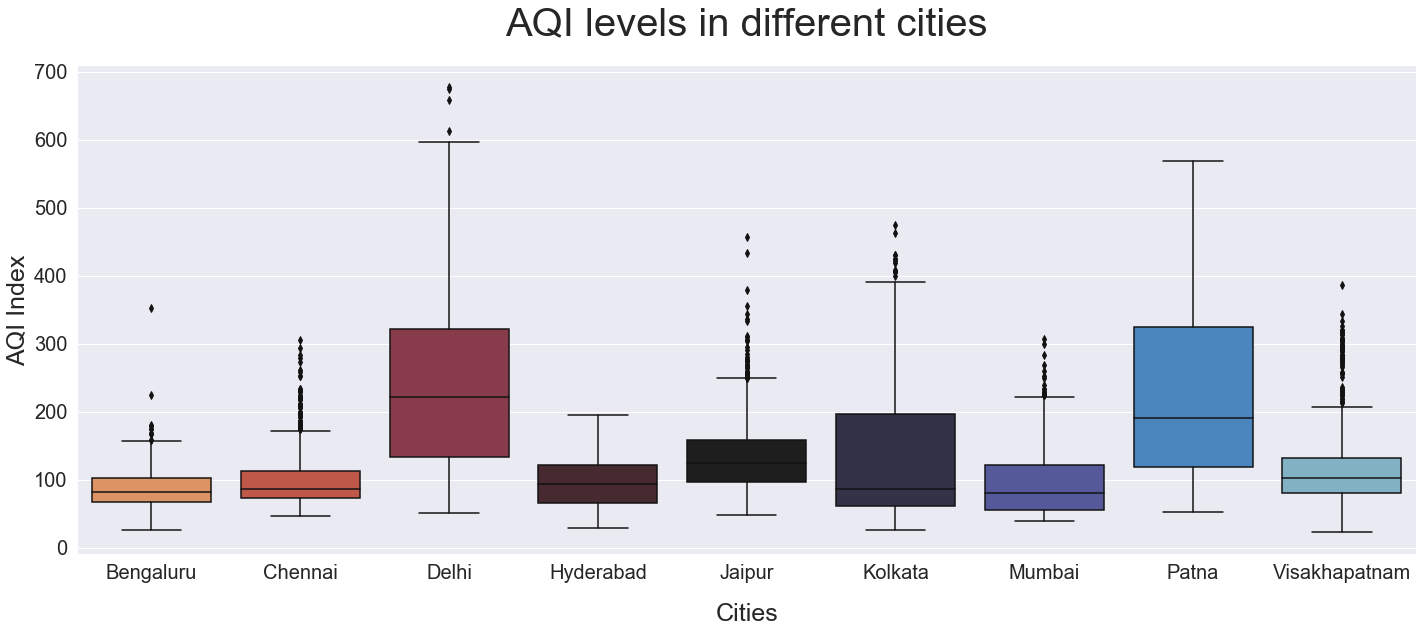

In [20]:
df_each_city = []
cities = ['Bengaluru', 'Chennai', 'Delhi', 'Hyderabad', 'Jaipur', 'Kolkata', 'Mumbai', 'Patna', 'Visakhapatnam']

for city in cities:
    df_each_city.append(df[df['City']==city]['AQI'])

sns.set(rc={'figure.figsize':(24,9)})
axes = sns.boxplot(data=df_each_city, palette='icefire_r')
axes.set_title("AQI levels in different cities", fontsize=40,pad=30)
axes.set_xlabel("Cities", fontsize=25, labelpad=20)
axes.set_ylabel("AQI Index", fontsize=25)
axes.set_xticklabels(cities,fontsize=20)
axes.set_yticklabels(axes.get_yticks().astype(int),fontsize=20)
plt.show()

From the above boxplot, it looks like there are some outliers in our data.

### Addressing Outliers

Let's define what an outlier is. An outlier is a data point that is different from rest of the data in a distribution.

$Formula : $

$$Outlier = Data > 1.5(IQR) + UpperQuartile$$ 
$$Outlier = Data < 1.5(IQR) - LowerQuartile$$

From the boxplot, we can see that there are no outliers that are below the lower bound of the boxplot. Hence we know that there are no values that are extremely small relative to other values in the dataset.

But, we can see that there are many outliers which are above the upper bound of the boxplot. This means that these large values can be due to incorrect observations or mistyped observation or observations made by a faulty instrument.

**But, we need to be careful!**

Just because it as an outlier it does not mean that it must be removed! There may be various reasons as to why we got such a high reading.

One such reason to support the above statement is that in India people celebrate Diwali by bursting firecrackers . This causes air pollution and that's one of the reasons why the AQI levels shoots up. There could have been a forest fire, which also causes pollution.

Hence the outliers that we have cannot be removed. These data points are valid observations in our opinion. Also the maximum value of AQI that we have is less than 700. Hence it makes sense to keep these observations rather than throwing them out!

### Plotting PM2.5 SO2 and CO levels of Bengaluru from Jan 1st 2019 to Dec 31st 2019 to observe trends

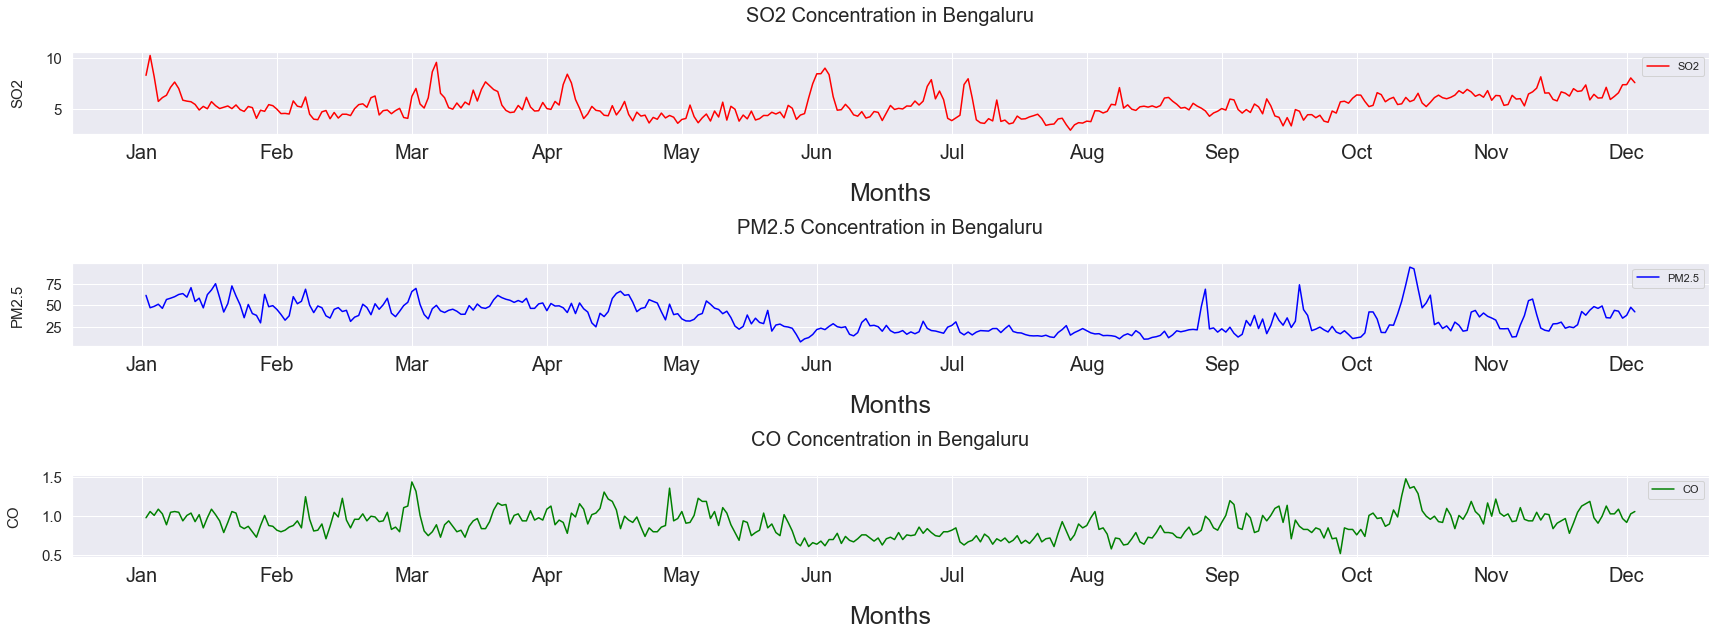

In [21]:
import matplotlib.ticker as ticker
df_each_city = []
months = ['0','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

for city in cities:
    df_each_city.append(df[df['City']==city][['PM2.5','SO2','CO','O3','AQI_Bucket','Date']])
    
for i in range(len(df_each_city)):
    df_each_city[i] = df_each_city[i][pd.to_datetime(df_each_city[i]['Date']) >= pd.to_datetime('2019-01-01')]
    df_each_city[i] = df_each_city[i][pd.to_datetime(df_each_city[i]['Date']) <= pd.to_datetime('2019-12-31')]

fig1,(axe1,axe2,axe3) = plt.subplots(3,1)
sns.set(rc={'figure.figsize':(20,15)})
axe1 = sns.lineplot(x = range(1,366), y=df_each_city[0]['SO2'], legend='brief', label='SO2', ax=axe1, color='red')
axe2 = sns.lineplot(x = range(1,366), y=df_each_city[0]['PM2.5'], legend='brief', label='PM2.5',ax=axe2, color='blue')
axe3 = sns.lineplot(x = range(1,366), y=df_each_city[0]['CO'],legend='brief', label='CO',ax=axe3, color='green')

axe1.xaxis.set_major_locator(ticker.MultipleLocator(33))
axe1.xaxis.set_major_formatter(ticker.ScalarFormatter())
axe2.xaxis.set_major_locator(ticker.MultipleLocator(33))
axe2.xaxis.set_major_formatter(ticker.ScalarFormatter())
axe3.xaxis.set_major_locator(ticker.MultipleLocator(33))
axe3.xaxis.set_major_formatter(ticker.ScalarFormatter())

axe1.set_xticklabels(months,fontsize=20)
axe2.set_xticklabels(months,fontsize=20)
axe3.set_xticklabels(months,fontsize=20)

axe1.set_xlabel("Months", fontsize=25, labelpad=20)
axe2.set_xlabel("Months", fontsize=25, labelpad=20)
axe3.set_xlabel("Months", fontsize=25, labelpad=20)

axe1.set_ylabel("SO2", fontsize=15, labelpad=20)
axe2.set_ylabel("PM2.5", fontsize=15, labelpad=20)
axe3.set_ylabel("CO", fontsize=15, labelpad=20)

axe1.set_title("SO2 Concentration in Bengaluru", fontsize=20,pad=30)
axe2.set_title("PM2.5 Concentration in Bengaluru", fontsize=20,pad=30)
axe3.set_title("CO Concentration in Bengaluru", fontsize=20,pad=30)

axe1.tick_params(axis='y',labelsize=15)
axe2.tick_params(axis='y',labelsize=15)
axe3.tick_params(axis='y',labelsize=15)

axe1.legend(loc='best')
plt.tight_layout()

Form the above line graph, we can see that the pollutants shoots up in the months of March through May. We also see that the pollutant levels starts increasing from September through December. This proves that the outliers maybe due to bursting of firecrackers.

## Distribution of SO2, PM2.5 and CO

We will plot the distribution of `SO2, PM2.5 and CO` levels of Bengaluru. By plotting the distributions, we can figure out the distribution of data.

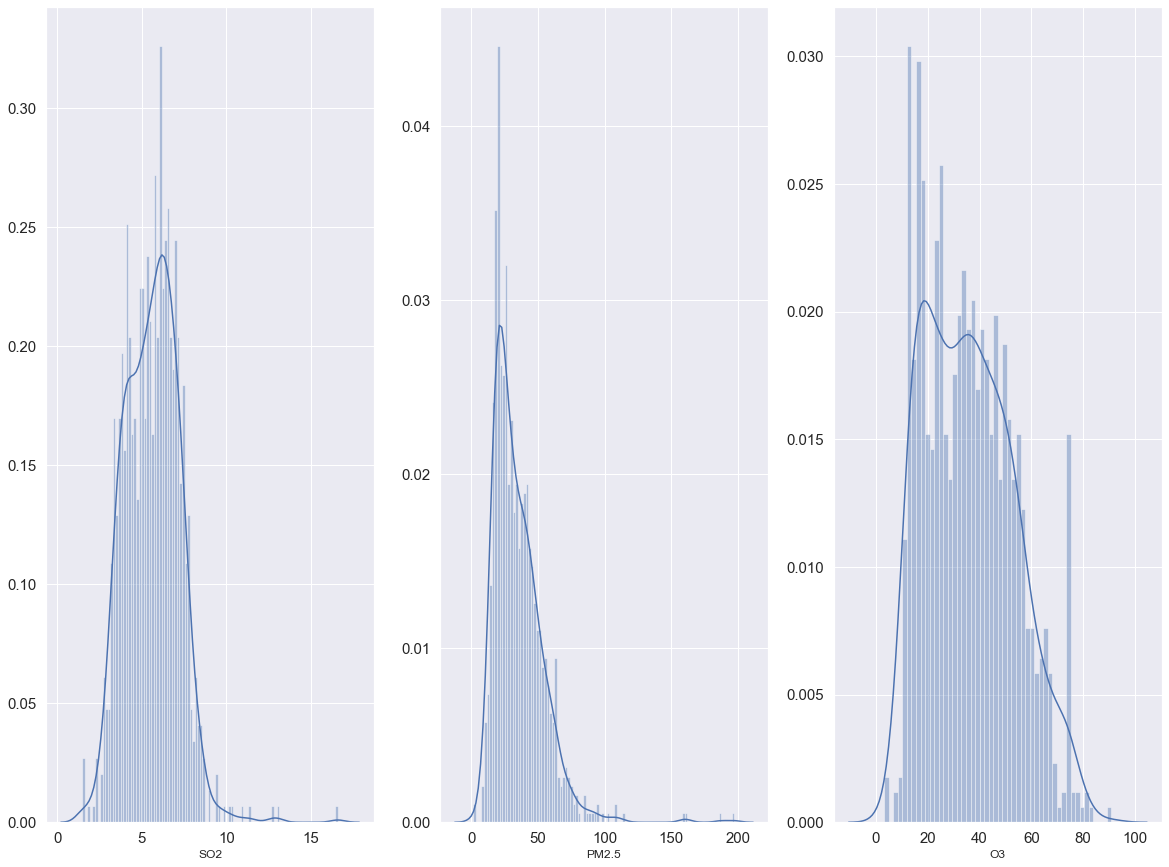

In [22]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3)
sns.set(rc={'figure.figsize':(20,10)})
sns.distplot(df[df['City']=='Bengaluru']['SO2'],ax=ax1, bins=100)
sns.distplot(df[df['City']=='Bengaluru']['PM2.5'],ax=ax2,bins=100)
sns.distplot(df[df['City']=='Bengaluru']['O3'],ax=ax3,bins=50)
ax1.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)
ax3.tick_params(labelsize=15)
plt.show()

From the above frequency distribution, we can tell that out data does not come from a normal distribution. Hence we will normalize our data before we proceed with further analysis.

## Normalization


Normlaization is one of the important steps in data preprocessing. Normalization zeros out the mean of the data and makes data have a unit standard deviation

$Formula$

$$Normalization = \frac{X - \mu}{\sigma}$$
$\sigma - Standard  Deviation$

$\mu - Mean$

In our case, we cannot normalize the columns by taking the mean and variance of the entire column. Each city will have different mean and standard deviations and hence we need to find the mean and variance of each city and perform normalization accordingly.

In [23]:
mean_df_city_wise = df.groupby(by='City').mean()
var_df_city_wise = df.groupby(by='City').var()

In [24]:
from sklearn.preprocessing import scale

columns = ['PM2.5','NO','NO2','NOx','CO','SO2','O3','Benzene','AQI','City']

df_each_city = []
for city in cities:
    df_each_city.append(df[df['City']==city][columns])
    
normalized_df = []

for city in df_each_city:
    normalized_df.append(scale(city[['PM2.5','NO','NO2','NOx','CO','SO2','O3','Benzene','AQI']]))

for i in range(len(df_each_city)):
    normalized_df[i] = pd.DataFrame(data=normalized_df[i],columns=columns[:-1])
    normalized_df[i]['City'] = cities[i]

final_df = pd.DataFrame()
final_df = pd.concat(normalized_df,ignore_index=True)
final_df.set_index('City')

,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,AQI
City,,,,,,,,,
Bengaluru,1.642642,-0.420808,-0.116072,1.990309,-2.758698,-0.922898,0.482450,-1.089222,1.228946
Bengaluru,1.234699,-0.203026,0.109417,3.046209,-2.055472,-0.333556,0.938429,-1.089222,2.684146
Bengaluru,0.309647,0.764712,0.513562,-0.026719,-0.883429,-1.461543,0.415223,-1.053712,1.415510
Bengaluru,-0.438334,0.835122,0.078196,-0.423688,-1.293644,-1.442532,-1.107044,-1.089222,-1.047137
Bengaluru,-0.681219,0.296399,0.144975,-0.538129,-0.942031,-1.556599,-1.717354,-1.089222,-1.420265
...,...,...,...,...,...,...,...,...,...
Visakhapatnam,-1.066230,-0.375577,-0.695554,-0.574765,-0.947642,-0.379682,-0.449316,-1.120639,-1.297334
Visakhapatnam,-0.749349,-0.767948,-0.633833,-0.765033,-0.791905,0.229730,-0.213252,-1.990694,-0.798908
Visakhapatnam,-0.799116,-0.765185,-0.419662,-0.651251,-0.916495,-0.398681,-0.184952,-2.414121,-0.833282


Now that we are done normalizing, we will plot these data and see if we get a bell curve.

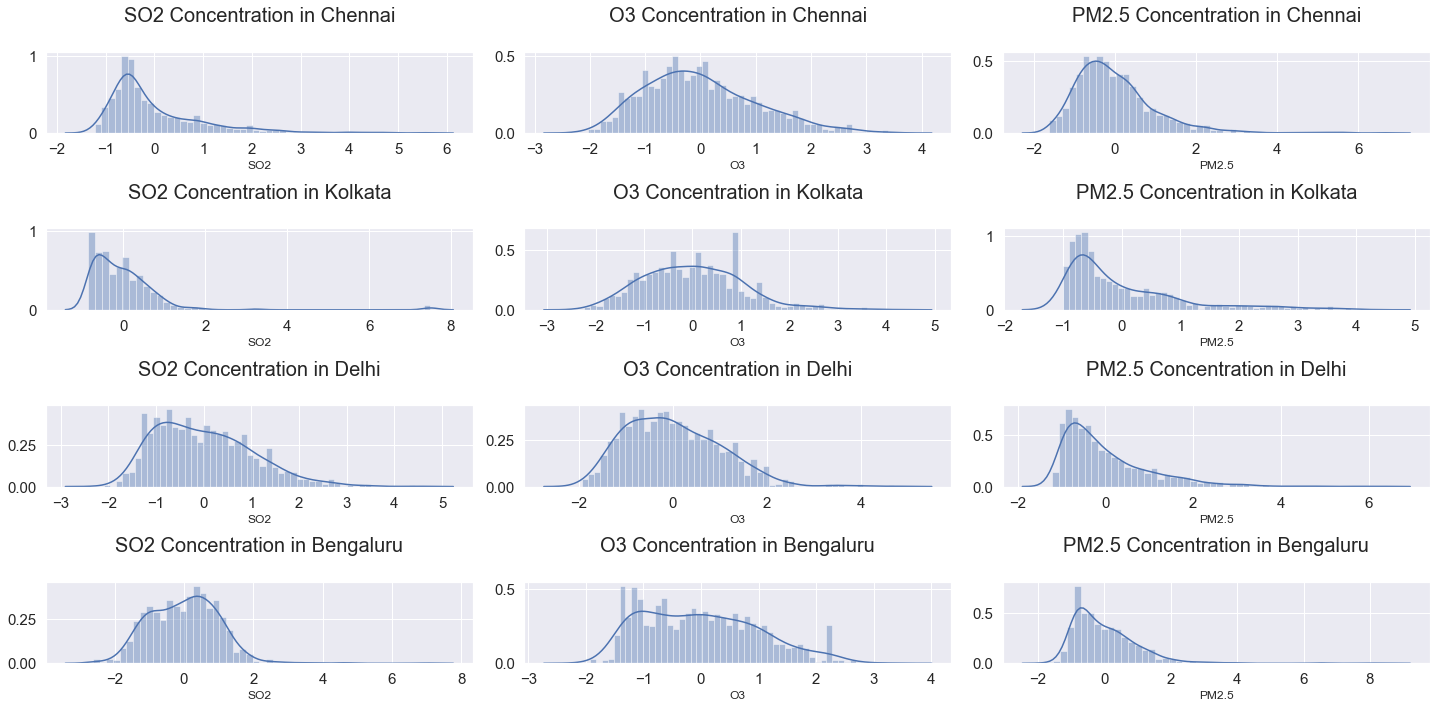

In [25]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12)) = plt.subplots(4,3)
sns.distplot(final_df[final_df['City']=='Chennai']['SO2'],ax=ax1, bins=50)
sns.distplot(final_df[final_df['City']=='Chennai']['O3'],ax=ax2,bins=50)
sns.distplot(final_df[final_df['City']=='Chennai']['PM2.5'],ax=ax3,bins=50)
sns.distplot(final_df[final_df['City']=='Kolkata']['SO2'],ax=ax4, bins=50)
sns.distplot(final_df[final_df['City']=='Kolkata']['O3'],ax=ax5,bins=50)
sns.distplot(final_df[final_df['City']=='Kolkata']['PM2.5'],ax=ax6,bins=50)
sns.distplot(final_df[final_df['City']=='Delhi']['SO2'],ax=ax7, bins=50)
sns.distplot(final_df[final_df['City']=='Delhi']['O3'],ax=ax8,bins=50)
sns.distplot(final_df[final_df['City']=='Delhi']['PM2.5'],ax=ax9,bins=50)
sns.distplot(final_df[final_df['City']=='Bengaluru']['SO2'],ax=ax10, bins=50)
sns.distplot(final_df[final_df['City']=='Bengaluru']['O3'],ax=ax11,bins=50)
sns.distplot(final_df[final_df['City']=='Bengaluru']['PM2.5'],ax=ax12,bins=50)

ax1.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)
ax3.tick_params(labelsize=15)
ax4.tick_params(labelsize=15)
ax5.tick_params(labelsize=15)
ax6.tick_params(labelsize=15)
ax7.tick_params(labelsize=15)
ax8.tick_params(labelsize=15)
ax9.tick_params(labelsize=15)
ax10.tick_params(labelsize=15)
ax11.tick_params(labelsize=15)
ax12.tick_params(labelsize=15)

ax1.set_title("SO2 Concentration in Chennai", fontsize=20,pad=30)
ax2.set_title("O3 Concentration in Chennai", fontsize=20,pad=30)
ax3.set_title("PM2.5 Concentration in Chennai", fontsize=20,pad=30)

ax4.set_title("SO2 Concentration in Kolkata", fontsize=20,pad=30)
ax5.set_title("O3 Concentration in Kolkata", fontsize=20,pad=30)
ax6.set_title("PM2.5 Concentration in Kolkata", fontsize=20,pad=30)

ax7.set_title("SO2 Concentration in Delhi", fontsize=20,pad=30)
ax8.set_title("O3 Concentration in Delhi", fontsize=20,pad=30)
ax9.set_title("PM2.5 Concentration in Delhi", fontsize=20,pad=30)

ax10.set_title("SO2 Concentration in Bengaluru", fontsize=20,pad=30)
ax11.set_title("O3 Concentration in Bengaluru", fontsize=20,pad=30)
ax12.set_title("PM2.5 Concentration in Bengaluru", fontsize=20,pad=30)

plt.tight_layout()

Now we will take a small smaple from the the normalized dataset and check if they come from a normal distribution or not. This can be done by plotting a probability plot.

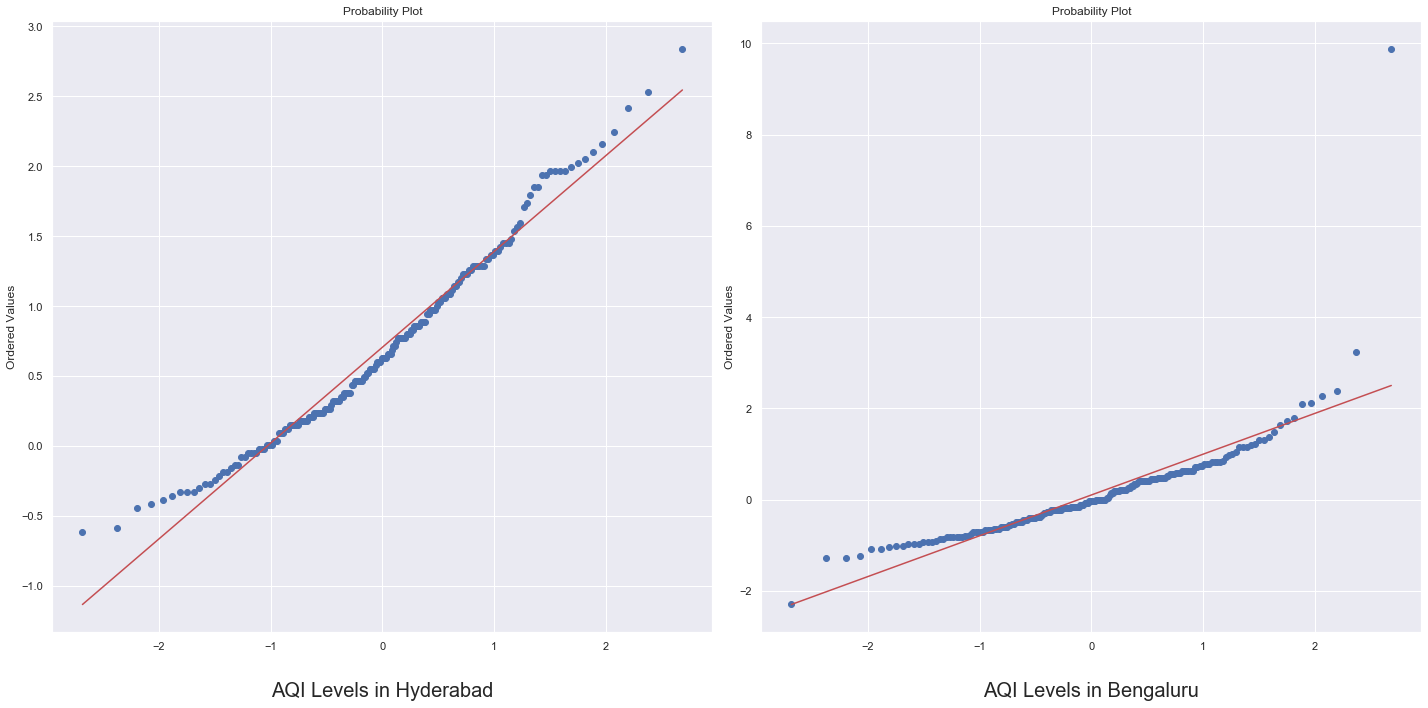

In [26]:
from scipy import stats
fig1, (ax1,ax2) = plt.subplots(1,2)
sns.set(rc={'figure.figsize':(24,9)})
stats.probplot(final_df[final_df['City']=='Hyderabad']['AQI'][10:200], plot=ax1)
stats.probplot(final_df[final_df['City']=='Bengaluru']['AQI'][10:200], plot=ax2)
ax1.set_xlabel('AQI Levels in Hyderabad',fontsize=20,labelpad=30)
ax2.set_xlabel('AQI Levels in Bengaluru',fontsize=20,labelpad=30)
plt.tight_layout()

From the above probability plot of a sample taken from the dataset, we can see that majority of the data points in the sample are lying close the red line. Hence we can conclude that the sample we took came from a normal distribution.

By this we can conclude that we have normalized the data correctly.

## Why is Normalization Required? 

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values.

Normalization is required only when the features or variables in the dataset have different scale.
Normalization also helps in the optimization of learning algorithms

## Hypothesis Testing

H0 : Pollution in Bangalore is greater than pollution in Delhi

H0 : Pollution in Coastal cities is greater than pollution in non coastal cities.

H0 : Pollution in cities which are connected by the golden quadrilateral is lesser than pollution in cities outside the golden quadrilateral


In [27]:
from scipy import stats

p_value = stats.ttest_ind(final_df[final_df['City']=='Bengaluru']['AQI'] ,final_df[final_df['City']=='Delhi']['AQI']) #returns (test statistic, p-value)
print(p_value)
alpha = 0.05
if p_value[1] < alpha:
    print("Hypothesis can be rejected, H1 is true")
else:
    print("Hypothesis : Pollution in Bangalore is greater than pollution in Delhi, cannot be rejected, H0 is true")
print("\n")    
p_value = stats.ttest_ind(final_df[final_df['City']=='Kolkata']['AQI'] ,final_df[final_df['City']=='Delhi']['AQI']) #returns (test statistic, p-value)
print(p_value)
alpha = 0.05
if p_value[1] < alpha:
    print("Hypothesis can be rejected, H1 is true")
else:
    print("Hypothesis : Pollution in Coastal cities is greater than pollution in non coastal cities., cannot be rejected, H0 is true")
print("\n")    
p_value = stats.ttest_ind(final_df[final_df['City']=='Kolkata']['AQI'] ,final_df[final_df['City']=='Patna']['AQI']) #returns (test statistic, p-value)
print(p_value)
alpha = 0.05
if p_value[1] < alpha:
    print("Hypothesis can be rejected, H1 is true")
else:
    print("Hypothesis : Pollution in cities which are connected by the golden quadrilateral is lesser than pollution in cities outside the golden quadrilateral, cannot be rejected, H0 is true")

Ttest_indResult(statistic=-1.9318648658764033e-15, pvalue=0.9999999999999984)
Hypothesis : Pollution in Bangalore is greater than pollution in Delhi, cannot be rejected, H0 is true


Ttest_indResult(statistic=7.418373396180866e-16, pvalue=0.9999999999999993)
Hypothesis : Pollution in Coastal cities is greater than pollution in non coastal cities., cannot be rejected, H0 is true


Ttest_indResult(statistic=1.3564486316782624e-15, pvalue=0.9999999999999989)
Hypothesis : Pollution in cities which are connected by the golden quadrilateral is lesser than pollution in cities outside the golden quadrilateral, cannot be rejected, H0 is true


## Correlation

In [28]:
final_df.corr()

,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,AQI
PM2.5,1.000000,0.358619,0.560620,0.475853,0.511511,0.182778,0.283544,0.379857,0.884556
NO,0.358619,1.000000,0.550242,0.786894,0.434283,0.189509,-0.090519,0.324431,0.352525
NO2,0.560620,0.550242,1.000000,0.756862,0.474734,0.203213,0.167378,0.403074,0.542792
NOx,0.475853,0.786894,0.756862,1.000000,0.545803,0.190258,0.031278,0.365401,0.485416
CO,0.511511,0.434283,0.474734,0.545803,1.000000,0.165711,0.193141,0.249352,0.537011
SO2,0.182778,0.189509,0.203213,0.190258,0.165711,1.000000,0.171367,0.206499,0.190928
O3,0.283544,-0.090519,0.167378,0.031278,0.193141,0.171367,1.000000,0.091473,0.365069
Benzene,0.379857,0.324431,0.403074,0.365401,0.249352,0.206499,0.091473,1.000000,0.370659
AQI,0.884556,0.352525,0.542792,0.485416,0.537011,0.190928,0.365069,0.370659,1.000000


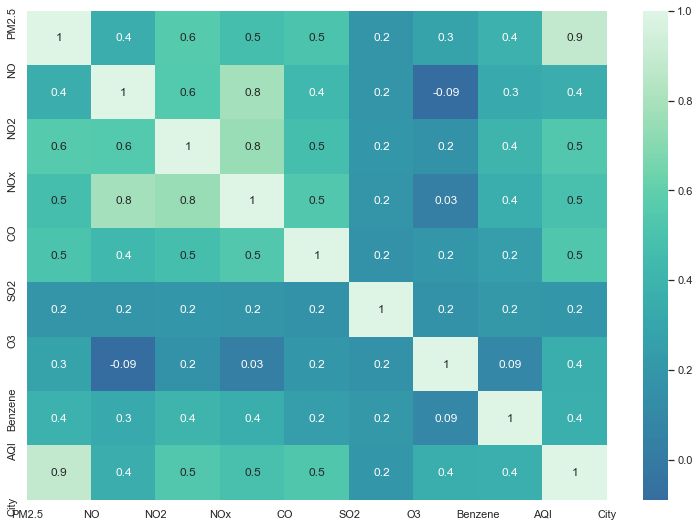

In [29]:
sns.set(rc={'figure.figsize':(13,9)})
hmap = sns.heatmap(final_df.corr(),center=0,annot=True, fmt='.1g', cmap="mako")
plt.xticks(range(len(final_df.columns)),final_df.columns)
plt.yticks(range(len(final_df.columns)),final_df.columns)
plt.show()